In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

data = pd.read_csv('./data/diabetes_data.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Gender
0,6,98,58,33,190,34.0,0.430,43,0,Female
1,2,112,75,32,0,35.7,0.148,21,0,Female
2,2,108,64,0,0,30.8,0.158,21,0,Female
3,8,107,80,0,0,24.6,0.856,34,0,Female
4,7,136,90,0,0,29.9,0.210,50,0,Female
...,...,...,...,...,...,...,...,...,...,...
773,6,103,72,32,190,37.7,0.324,55,0,Female
774,1,71,48,18,76,20.4,0.323,22,0,Female
775,0,117,0,0,0,33.8,0.932,44,0,Female
776,4,154,72,29,126,31.3,0.338,37,0,Female


Задание 8.1
1 point possible (graded)
Начнём с поиска дубликатов в данных. Найдите все повторяющиеся строки в данных и удалите их. Для поиска используйте все признаки в данных. Сколько записей осталось в данных?

In [63]:
data_no_duplicates = data.drop_duplicates()
data_no_duplicates

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Gender
0,6,98,58,33,190,34.0,0.430,43,0,Female
1,2,112,75,32,0,35.7,0.148,21,0,Female
2,2,108,64,0,0,30.8,0.158,21,0,Female
3,8,107,80,0,0,24.6,0.856,34,0,Female
4,7,136,90,0,0,29.9,0.210,50,0,Female
...,...,...,...,...,...,...,...,...,...,...
763,5,139,64,35,140,28.6,0.411,26,0,Female
764,1,96,122,0,0,22.4,0.207,27,0,Female
765,10,101,86,37,0,45.6,1.136,38,1,Female
766,0,141,0,0,0,42.4,0.205,29,1,Female


Задание 8.2
1 point possible (graded)
Далее найдите все неинформативные признаки в данных и избавьтесь от них. В качестве порога информативности возьмите 0.95: удалите все признаки, для которых 95 % значений повторяются или 95 % записей уникальны. В ответ запишите имена признаков, которые вы нашли (без кавычек).

In [64]:
low_info_cols = [];
MAX_VALUE = 0.95
for col in data_no_duplicates.columns:
  top_freq = data_no_duplicates[col].value_counts(normalize=True).max()
  
  nunique_ratio = data_no_duplicates[col].nunique() / data_no_duplicates[col].count()
  if top_freq > MAX_VALUE:
    low_info_cols.append(col)
    print(f'{col}: {round(top_freq*100, 2)}% одинаковых значений')
  if nunique_ratio > MAX_VALUE:
    low_info_cols.append(col)
    print(f'{col}: {round(nunique_ratio*100, 2)}% уникальных значений')
    
data = data_no_duplicates.drop(low_info_cols, axis=1)
data
    


Gender: 100.0% одинаковых значений


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,98,58,33,190,34.0,0.430,43,0
1,2,112,75,32,0,35.7,0.148,21,0
2,2,108,64,0,0,30.8,0.158,21,0
3,8,107,80,0,0,24.6,0.856,34,0
4,7,136,90,0,0,29.9,0.210,50,0
...,...,...,...,...,...,...,...,...,...
763,5,139,64,35,140,28.6,0.411,26,0
764,1,96,122,0,0,22.4,0.207,27,0
765,10,101,86,37,0,45.6,1.136,38,1
766,0,141,0,0,0,42.4,0.205,29,1


Попробуйте найти пропуски в данных с помощью метода isnull().

Спойлер: ничего не найдёте. А они есть! Просто они скрыты от наших глаз. В таблице пропуски в столбцах Glucose, BloodPressure, SkinThickness, Insulin и BMI обозначены нулём, поэтому традиционные методы поиска пропусков ничего вам не покажут. Давайте это исправим!

Замените все записи, равные 0, в столбцах Glucose, BloodPressure, SkinThickness, Insulin и BMI на символ пропуска. Его вы можете взять из библиотеки numpy: np.nan.

Какая доля пропусков содержится в столбце Insulin? Ответ округлите до сотых.

In [65]:
colums_to_replace =  ['Glucose','BloodPressure', 'SkinThickness','Insulin', 'BMI'];
data[colums_to_replace] = data[colums_to_replace].replace(0, np.nan)
data['Insulin'].isnull().mean()


0.4869791666666667

Удалите из данных признаки, где число пропусков составляет более 30 %. Сколько признаков осталось в ваших данных (с учетом удаленных неинформативных признаков в задании 8.2)?

In [66]:
#задаем минимальный порог: вычисляем 70% от числа строк
thresh_value = data.shape[0] * 0.7
#удаляем столбцы, в которых более 30% (100-70) пропусков
data = data.dropna(thresh=thresh_value,axis=1)
data


,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,98.0,58.0,33.0,34.0,0.430,43,0
1,2,112.0,75.0,32.0,35.7,0.148,21,0
2,2,108.0,64.0,NaN,30.8,0.158,21,0
3,8,107.0,80.0,NaN,24.6,0.856,34,0
4,7,136.0,90.0,NaN,29.9,0.210,50,0
...,...,...,...,...,...,...,...,...
763,5,139.0,64.0,35.0,28.6,0.411,26,0
764,1,96.0,122.0,NaN,22.4,0.207,27,0
765,10,101.0,86.0,37.0,45.6,1.136,38,1
766,0,141.0,NaN,NaN,42.4,0.205,29,1


Задание 8.5
1 point possible (graded)
Удалите из данных только те строки, в которых содержится более двух пропусков одновременно. Чему равно результирующее число записей в таблице?

In [67]:
data = data.dropna(axis=0, thresh=len(data.columns)-2)
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,98.0,58.0,33.0,34.0,0.430,43,0
1,2,112.0,75.0,32.0,35.7,0.148,21,0
2,2,108.0,64.0,NaN,30.8,0.158,21,0
3,8,107.0,80.0,NaN,24.6,0.856,34,0
4,7,136.0,90.0,NaN,29.9,0.210,50,0
...,...,...,...,...,...,...,...,...
763,5,139.0,64.0,35.0,28.6,0.411,26,0
764,1,96.0,122.0,NaN,22.4,0.207,27,0
765,10,101.0,86.0,37.0,45.6,1.136,38,1
766,0,141.0,NaN,NaN,42.4,0.205,29,1


Задание 8.6
1 point possible (graded)
В оставшихся записях замените пропуски на медиану. Чему равно среднее значение в столбце SkinThickness? Ответ округлите до десятых.

In [68]:
values = {
    'Pregnancies': data['Pregnancies'].median(),
    'Glucose':data['Glucose'].median(),
    'BloodPressure':data['BloodPressure'].median(),
    'SkinThickness':data['SkinThickness'].median(),
    'BMI':data['BMI'].median(),
    'DiabetesPedigreeFunction':data['DiabetesPedigreeFunction'].median(),
    'Age':data['Age'].median(),
    'Outcome':data['Outcome'].median(),
}
data = data.fillna(values)
print(data['SkinThickness'].mean())

29.109067017082786


Задание 8.7
1 point possible (graded)
Сколько выбросов найдёт классический метод межквартильного размаха в признаке SkinThickness?

Text(0.5, 1.0, 'SkinThickness BoxPlot')

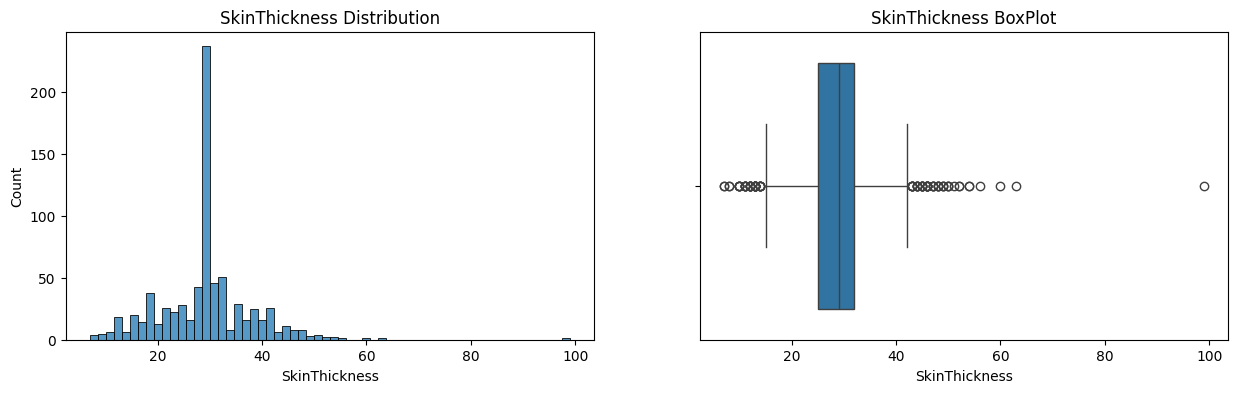

In [69]:
fig,axes = plt.subplots(nrows=1,ncols=2, figsize=(15,4))
histplot = sns.histplot(data=data, x='SkinThickness', ax=axes[0])
histplot.set_title('SkinThickness Distribution')
boxplot = sns.boxplot(data=data, x='SkinThickness',ax=axes[1])
boxplot.set_title('SkinThickness BoxPlot')


Алгоритм метода:

→ вычислить 25-ый и 75-ый квантили (первый и третий квартили) — и  для признака, который мы исследуем;

→ вычислить межквартильное расстояние: ;

→ вычислить верхнюю и нижнюю границы Тьюки: 

→ найти наблюдения, которые выходят за пределы границ .

В соответствии с этим алгоритмом напишем функцию outliers_iqr(), которая вам может ещё не раз пригодиться в реальных задачах. Эта функция принимает на вход DataFrame и признак, по которому ищутся выбросы, а затем возвращает потенциальные выбросы, найденные с помощью метода Тьюки, и очищенный от них датасет.

Квантили вычисляются с помощью метода quantile(). Потенциальные выбросы определяются при помощи фильтрации данных по условию выхода за пределы верхней или нижней границы.

def outliers_iqr(data, feature):
    x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned
✍️ Применим эту функцию к таблице sber_data и признаку full_sq, а также выведем размерности результатов:

outliers, cleaned = outliers_iqr(sber_data, 'full_sq')
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

In [70]:
def outliers_iqr(data,feature):
  x = data[feature]
  quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75), 
  iqr = quartile_3 - quartile_1
  lower_bound = quartile_1 - ( iqr * 1.5 )
  upper_bound = quartile_3 + ( iqr * 1.5 )
  outliers = data[(x < lower_bound) | (x > upper_bound)]
  cleaned =  data[(x >= lower_bound) | (x <= upper_bound)]
  return outliers, cleaned

outliers, cleaned = outliers_iqr(data, 'SkinThickness')
display(outliers)

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
22,13,106.0,72.0,54.0,36.6,0.178,45,0
27,1,100.0,74.0,12.0,19.5,0.149,28,0
30,0,162.0,76.0,56.0,53.2,0.759,25,1
36,2,197.0,70.0,99.0,34.7,0.575,62,1
46,4,111.0,72.0,47.0,37.1,1.390,56,1
...,...,...,...,...,...,...,...,...
750,4,173.0,70.0,14.0,29.7,0.361,33,1
751,9,145.0,80.0,46.0,37.9,0.637,40,1
752,1,122.0,90.0,51.0,49.7,0.325,31,1
755,10,148.0,84.0,48.0,37.6,1.001,51,1


Задание 8.8
1 point possible (graded)
Сколько выбросов найдёт классический метод z-отклонения в признаке SkinThickness?

Давайте реализуем алгоритм метода z-отклонения. Описание алгоритма метода:

→ вычислить математическое ожидание  (среднее) и стандартное отклонение  признака ;

→ вычислить нижнюю и верхнюю границу интервала как:

→ найти наблюдения, которые выходят за пределы границ.

✍️ Напишем функцию outliers_z_score(), которая реализует этот алгоритм. 

На вход она принимает DataFrame и признак, по которому ищутся выбросы. В дополнение добавим в функцию возможность работы в логарифмическом масштабе: для этого введём аргумент log_scale. Если он равен True, то будем логарифмировать рассматриваемый признак, иначе — оставляем его в исходном виде.

Как и раньше, функция будет возвращать выбросы и очищенные от них данные:

def outliers_z_score(data, feature, log_scale=False):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - 3 * sigma
    upper_bound = mu + 3 * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

In [71]:
def outliers_z_score(data,feature, log_scale=False):
  if log_scale:
    x = np.log(data[feature])
  else:
    x = data[feature]
  mu = x.mean()
  sigma = x.std()
  lower_bound = mu - 3 * sigma
  upper_bound = mu + 3 *sigma
  outliers = data[( x < lower_bound ) | ( x > upper_bound )]
  cleaned = data[( x >= lower_bound ) | ( x <= upper_bound )]
  return outliers,cleaned
outliers,cleaned = outliers_z_score(data, 'SkinThickness')
display(outliers)  

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
30,0,162.0,76.0,56.0,53.2,0.759,25,1
36,2,197.0,70.0,99.0,34.7,0.575,62,1
382,0,180.0,78.0,63.0,59.4,2.420,25,1
444,0,100.0,88.0,60.0,46.8,0.962,31,0


Задание 8.9
1 point possible (graded)
На приведённой гистограмме показано распределение признака DiabetesPedigreeFunction. Такой вид распределения очень похож на логнормальный, и он заставляет задуматься о логарифмировании признака. Найдите сначала число выбросов в признаке DiabetesPedigreeFunction с помощью классического метода межквартильного размаха.



Затем найдите число выбросов в этом же признаке в логарифмическом масштабе (при логарифмировании единицу прибавлять не нужно!). Какова разница между двумя этими числами (вычтите из первого второе)?

In [72]:
outliers, cleaned = outliers_iqr(data,'DiabetesPedigreeFunction')
print(len(outliers))

29


In [73]:
outliers, cleaned = outliers_z_score(data,'DiabetesPedigreeFunction',log_scale=True)
print(len(outliers))

0
